In [1]:
from scipy import io
data = io.loadmat("mnist_data.mat")

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb 13 17:30:33 2019',
 '__version__': '1.0',
 '__globals__': [],
 'training_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([[8],
        [2],
        [7],
        ...,
        [3],
        [6],
        [0]], dtype=uint8),
 'test_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
from tune_sklearn.tune_search import TuneGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from ray.tune.schedulers import MedianStoppingRule
import time

In [4]:
X = data["training_data"]
y = data["training_labels"].ravel()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0)

tuned_parameters = {'kernel': ['linear'],
                    'C': [1e-20, 1e-10, 1e-5]
                    }

In [5]:
ts_times_overall = []
ts_cv_results = []
for size in [1000, 2000, 3000, 4000, 5000]:
    X_subset = X_train[:size]
    y_subset = y_train[:size]
    start = time.time()
    tune_search = TuneGridSearchCV(SVC(),
                                   tuned_parameters,
                                   scheduler=MedianStoppingRule(metric="average_test_score"))
    tune_search.fit(X_subset, y_subset)
    end = time.time()
    ts_time_overall = end - start

    pred = tune_search.predict(X_test)

    correct = 0
    for i in range(len(pred)):
        if pred[i] == y_test[i]:
            correct += 1
    print(correct / len(pred))
    print(tune_search.cv_results_)
    print(ts_time_overall)
    
    ts_times_overall.append(ts_time_overall)
    ts_cv_results.append(tune_search.cv_results_)

2020-02-24 02:33:01,291	INFO resource_spec.py:212 -- Starting Ray with 5.66 GiB memory available for workers and up to 2.85 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-02-24 02:33:02,114	INFO services.py:1083 -- View the Ray dashboard at localhost:8265
2020-02-24 02:33:10,649	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


0.8766666666666667
{'params': [{'C': 1e-20, 'kernel': 'linear'}, {'C': 1e-10, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}], 'split0_test_score': array([0.13 , 0.13 , 0.885]), 'split1_test_score': array([0.135, 0.135, 0.895]), 'split2_test_score': array([0.135, 0.135, 0.86 ]), 'split3_test_score': array([0.135, 0.135, 0.905]), 'split4_test_score': array([0.13, 0.13, 0.92]), 'mean_test_score': array([0.133, 0.133, 0.893]), 'std_test_score': array([0.00244949, 0.00244949, 0.02014944]), 'rank_test_score': array([2, 2, 1], dtype=int32), 'time_total_s': array([4.60599971, 4.63619614, 1.66792393]), 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object)}
9.831382989883423


2020-02-24 02:33:34,677	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


0.8938333333333334
{'params': [{'C': 1e-20, 'kernel': 'linear'}, {'C': 1e-10, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}], 'split0_test_score': array([0.12 , 0.12 , 0.885]), 'split1_test_score': array([0.12, 0.12, 0.87]), 'split2_test_score': array([0.12, 0.12, 0.9 ]), 'split3_test_score': array([0.12  , 0.12  , 0.9175]), 'split4_test_score': array([0.12  , 0.12  , 0.8825]), 'mean_test_score': array([0.12 , 0.12 , 0.891]), 'std_test_score': array([0.        , 0.        , 0.01632483]), 'rank_test_score': array([2, 2, 1], dtype=int32), 'time_total_s': array([19.53509998, 19.64134884,  4.8765409 ]), 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object)}
22.02262783050537


2020-02-24 02:34:26,080	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


0.8998333333333334
{'params': [{'C': 1e-20, 'kernel': 'linear'}, {'C': 1e-10, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}], 'split0_test_score': array([0.11333333, 0.11333333, 0.885     ]), 'split1_test_score': array([0.11333333, 0.11333333, 0.90666667]), 'split2_test_score': array([0.11333333, 0.11333333, 0.90333333]), 'split3_test_score': array([0.11333333, 0.11333333, 0.90333333]), 'split4_test_score': array([0.11333333, 0.11333333, 0.91      ]), 'mean_test_score': array([0.11333333, 0.11333333, 0.90166667]), 'std_test_score': array([0.        , 0.        , 0.00869227]), 'rank_test_score': array([2, 2, 1], dtype=int32), 'time_total_s': array([44.52373815, 44.71481681,  9.22442818]), 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=obje

2020-02-24 02:36:00,551	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


0.9031666666666667
{'params': [{'C': 1e-20, 'kernel': 'linear'}, {'C': 1e-10, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}], 'split0_test_score': array([0.1125 , 0.1125 , 0.89625]), 'split1_test_score': array([0.1125 , 0.1125 , 0.92875]), 'split2_test_score': array([0.1125 , 0.1125 , 0.90125]), 'split3_test_score': array([0.1125 , 0.1125 , 0.90875]), 'split4_test_score': array([0.11375, 0.11375, 0.89625]), 'mean_test_score': array([0.11275, 0.11275, 0.90625]), 'std_test_score': array([0.0005    , 0.0005    , 0.01214496]), 'rank_test_score': array([2, 2, 1], dtype=int32), 'time_total_s': array([83.78176117, 84.01392794, 14.67050695]), 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object)}
89.95384287834167


2020-02-24 02:38:16,404	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


0.9018333333333334
{'params': [{'C': 1e-20, 'kernel': 'linear'}, {'C': 1e-10, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}], 'split0_test_score': array([0.108, 0.108, 0.904]), 'split1_test_score': array([0.109, 0.109, 0.912]), 'split2_test_score': array([0.109, 0.109, 0.91 ]), 'split3_test_score': array([0.109, 0.109, 0.911]), 'split4_test_score': array([0.108, 0.108, 0.902]), 'mean_test_score': array([0.1086, 0.1086, 0.9078]), 'std_test_score': array([0.0004899 , 0.0004899 , 0.00401995]), 'rank_test_score': array([2, 2, 1], dtype=int32), 'time_total_s': array([124.43639898, 124.84345794,  20.48403597]), 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object)}
130.80773901939392


In [11]:
gs_times_overall = []
gs_cv_results = []
for size in [1000, 2000, 3000, 4000, 5000]:
    X_subset = X_train[:size]
    y_subset = y_train[:size]
    start = time.time()
    gs = GridSearchCV(SVC(), tuned_parameters)
    gs.fit(X_subset, y_subset)
    end = time.time()
    gs_time_overall = end - start

    gs_pred = gs.predict(X_test)

    correct = 0
    for i in range(len(gs_pred)):
        if gs_pred[i] == y_test[i]:
            correct += 1
    print(correct / len(gs_pred))
    print(gs.cv_results_)
    print(gs_time_overall)
    
    gs_times_overall.append(gs_time_overall)
    gs_cv_results.append(gs.cv_results_)

0.8766666666666667
{'mean_fit_time': array([0.78797131, 0.79079151, 0.24086533]), 'std_fit_time': array([0.0162334 , 0.00342097, 0.00515999]), 'mean_score_time': array([0.11671829, 0.11641898, 0.07412729]), 'std_score_time': array([0.00233609, 0.00079673, 0.00113951]), 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-20, 'kernel': 'linear'}, {'C': 1e-10, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}], 'split0_test_score': array([0.13 , 0.13 , 0.885]), 'split1_test_score': array([0.135, 0.135, 0.895]), 'split2_test_score': array([0.135, 0.135, 0.86 ]), 'split3_test_score': array([0.135, 0.135, 0.905]), 'split4_test_score': array([0.13, 0.13, 0.92]), 'mean_test_score': array([0.133, 0.133, 0.893]), 'std_test_score

In [12]:
import matplotlib.pyplot as plt
import numpy as np

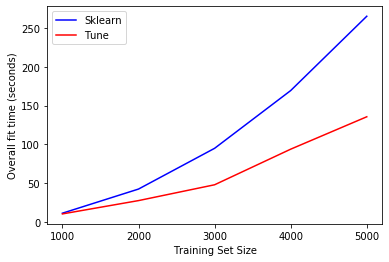

In [13]:
sizes = [1000, 2000, 3000, 4000, 5000]
plt.plot(sizes, gs_times_overall, 'b-', sizes, ts_times_overall, 'r-')
plt.xticks(sizes)
plt.xlabel("Training Set Size")
plt.ylabel("Overall fit time (seconds)")
plt.legend(["Sklearn", "Tune"])
plt.show()

In [43]:
X[0].shape

(784,)

In [14]:
tune_search.cv_results_

{'params': [{'C': 1e-20, 'kernel': 'linear'},
  {'C': 1e-10, 'kernel': 'linear'},
  {'C': 1e-05, 'kernel': 'linear'}],
 'split0_test_score': array([0.108, 0.108, 0.904]),
 'split1_test_score': array([0.109, 0.109, 0.912]),
 'split2_test_score': array([0.109, 0.109, 0.91 ]),
 'split3_test_score': array([0.109, 0.109, 0.911]),
 'split4_test_score': array([0.108, 0.108, 0.902]),
 'mean_test_score': array([0.1086, 0.1086, 0.9078]),
 'std_test_score': array([0.0004899 , 0.0004899 , 0.00401995]),
 'rank_test_score': array([2, 2, 1], dtype=int32),
 'time_total_s': array([127.84997392, 128.23335886,  21.95795798]),
 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object)}

In [15]:
gs.cv_results_

{'mean_fit_time': array([21.54186797, 21.1592371 ,  2.65226054]),
 'std_fit_time': array([0.41088554, 0.09600954, 0.02582631]),
 'mean_score_time': array([2.98731327, 2.91306949, 1.06474967]),
 'std_score_time': array([0.05812592, 0.00583591, 0.01061244]),
 'param_C': masked_array(data=[1e-20, 1e-10, 1e-05],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-20, 'kernel': 'linear'},
  {'C': 1e-10, 'kernel': 'linear'},
  {'C': 1e-05, 'kernel': 'linear'}],
 'split0_test_score': array([0.108, 0.108, 0.904]),
 'split1_test_score': array([0.109, 0.109, 0.912]),
 'split2_test_score': array([0.109, 0.109, 0.91 ]),
 'split3_test_score': array([0.109, 0.109, 0.911]),
 'split4_test_score': array([0.108, 0.108, 0.902]),
 'mean_test_score': array([0.1086, 0.1086, 0.9078]),
 's